### Setting Dataframe display options

In [84]:
#Supress scientific notation of values
pd.options.display.float_format = '{:.2f}'.format

#Increasing max number of columns and rows displayed with pandas.
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

### Loading Libraries and Data

In [85]:
#Importing the necessary modules
!pip install python-pptx 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pptx import Presentation
from pptx.util import Inches

In [86]:
#Filtering out the warnings
import warnings
warnings.filterwarnings('ignore')

In [87]:
#Loading CustomerLoanData set file in to CustomerLoanData frame.
file_path = 'loan.csv'

#Using low memory flag to load columns with multiple CustomerLoanData types.
CustomerLoanData = pd.read_csv(file_path, low_memory=False)

In [88]:
CustomerLoanData.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.00,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.00,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,NaN,NaN,3,0,13648,83.70%,9,f,0.00,0.00,5863.16,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,NaN,May-16,0.00,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.00,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.00,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.00,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0,Apr-99,5,NaN,NaN,3,0,1687,9.40%,4,f,0.00,0.00,1008.71,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.00,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.00,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.00,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.00,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,NaN,NaN,2,0,2956,98.50%,10,f,0.00,0.00,3005.67,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,NaN,May-16,0.00,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.00,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.00,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.00,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0,Feb-96,1,35.00,NaN,10,0,5598,21%,37,f,0.00,0.00,12231.89,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,NaN,Apr-16,0.00,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [89]:
#Shape of CustomerLoanData frame
CustomerLoanData.shape

(39717, 111)

In [90]:
CustomerLoanData.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 111 columns):
 #    Column                          Dtype  
---   ------                          -----  
 0    id                              int64  
 1    member_id                       int64  
 2    loan_amnt                       int64  
 3    funded_amnt                     int64  
 4    funded_amnt_inv                 float64
 5    term                            object 
 6    int_rate                        object 
 7    installment                     float64
 8    grade                           object 
 9    sub_grade                       object 
 10   emp_title                       object 
 11   emp_length                      object 
 12   home_ownership                  object 
 13   annual_inc                      float64
 14   verification_status             object 
 15   issue_d                         object 
 16   loan_status                     object 
 17   pymnt_plan

In [91]:
CustomerLoanData.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
count,39717.00,39717.00,39717.00,39717.00,39717.00,39717.00,39717.00,39717.00,39717.00,39717.00,14035.00,2786.00,39717.00,39717.00,39717.00,39717.00,39717.00,39717.00,39717.00,39717.00,39717.00,39717.00,39717.00,39717.00,39717.00,39717.00,39661.00,0.00,39717.00,0.00,0.00,0.00,39717.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,39661.00,39717.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,39020.00,39678.00,0.00,0.00,0.00,0.00
mean,683131.91,850463.56,11219.44,10947.71,10397.45,324.56,68968.93,13.32,0.15,0.87,35.90,69.70,9.29,0.06,13382.53,22.09,51.23,50.99,12153.60,11567.15,9793.35,2263.66,1.36,95.22,12.41,2678.83,0.00,NaN,1.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.04,0.00,NaN,NaN,NaN,NaN
std,210694.13,265678.31,7456.67,7187.24,7128.45,208.87,63793.77,6.68,0.49,1.07,22.02,43.82,4.40,0.24,15885.02,11.40,375.17,373.82,9042.04,8942.67,7065.52,2608.11,7.29,688.74,148.67,4447.14,0.00,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.20,0.00,NaN,NaN,NaN,NaN
min,54734.00,70699.00,500.00,500.00,0.00,15.69,4000.00,0.00,0.00,0.00,0.00,0.00,2.00,0.00,0.00,2.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,NaN,1.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.00,NaN,NaN,NaN,NaN
25%,516221.00,666780.00,5500.00,5400.00,5000.00,167.02,40404.00,8.17,0.00,0.00,18.00,22.00,6.00,0.00,3703.00,13.00,0.00,0.00,5576.93,5112.31,4600.00,662.18,0.00,0.00,0.00,218.68,0.00,NaN,1.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.00,NaN,NaN,NaN,NaN
50%,665665.00,850812.00,10000.00,9600.00,8975.00,280.22,59000.00,13.40,0.00,1.00,34.00,90.00,9.00,0.00,8850.00,20.00,0.00,0.00,9899.64,9287.15,8000.00,1348.91,0.00,0.00,0.00,546.14,0.00,NaN,1.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0

### Removing columns with more than 40% values

In [92]:
#Finding percentage of null or missing values
null_perc = round(100*(CustomerLoanData.isnull().sum()/len(CustomerLoanData.index)), 2)
null_perc

id                                 0.00
member_id                          0.00
loan_amnt                          0.00
funded_amnt                        0.00
funded_amnt_inv                    0.00
term                               0.00
int_rate                           0.00
installment                        0.00
grade                              0.00
sub_grade                          0.00
emp_title                          6.19
emp_length                         2.71
home_ownership                     0.00
annual_inc                         0.00
verification_status                0.00
issue_d                            0.00
loan_status                        0.00
pymnt_plan                         0.00
url                                0.00
desc                              32.58
purpose                            0.00
title                              0.03
zip_code                           0.00
addr_state                         0.00
dti                                0.00


In [93]:
#Removing columns which has more than 40% null values in it.
CustomerLoanData.drop(null_perc[ null_perc > 40 ].index, axis=1, inplace=True)

In [94]:
CustomerLoanData.shape

(39717, 54)

### Removing irrelevant columns

In [95]:
#Removing irrelevant columns which are calculated after loan is approved thus have no relevance to the analysis
##The columns removed are customer behaviour variables and are calculated after thus they cannot be used as input for the analysis
CustomerLoanData.drop(['delinq_2yrs','earliest_cr_line','inq_last_6mths','open_acc','pub_rec','revol_util','out_prncp','out_prncp_inv','total_pymnt','total_pymnt_inv','total_rec_prncp','total_rec_int','total_rec_late_fee','recoveries','collection_recovery_fee','last_pymnt_d','last_pymnt_amnt','last_credit_pull_d','application_type'], axis=1, inplace=True)
#Removing desc,emp_title,desc as they have no significance to the analysis as they are random varaibles and hold infomration which might not have significance to the conclusions
CustomerLoanData=CustomerLoanData.drop(['title','emp_title','desc','url'],axis=1)
#Removing zip_code as it is a masked CustomerLoanData and cannot be used as input for the analysis
CustomerLoanData=CustomerLoanData.drop(['zip_code'],axis=1)
#Removing member_id as it is a duplicate index column and is not required for the analysis
CustomerLoanData=CustomerLoanData.drop(['member_id'],axis=1)
#Removing funded_amnt_inv as it is a internal CustomerLoanData and is calculated after loan approval thus cannot be used as input for the analysis
CustomerLoanData=CustomerLoanData.drop(['funded_amnt_inv'],axis=1)
#Shape of the CustomerLoanDataframe after removing columns
print(CustomerLoanData.shape)

(39717, 28)


In [96]:
CustomerLoanData.columns

Index(['id', 'loan_amnt', 'funded_amnt', 'term', 'int_rate', 'installment',
       'grade', 'sub_grade', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'pymnt_plan',
       'purpose', 'addr_state', 'dti', 'revol_bal', 'total_acc',
       'initial_list_status', 'collections_12_mths_ex_med', 'policy_code',
       'acc_now_delinq', 'chargeoff_within_12_mths', 'delinq_amnt',
       'pub_rec_bankruptcies', 'tax_liens'],
      dtype='object')

In [97]:
#Checking columns for irrelevant data which has no impact to analysis(having very few unqiue values)
print(CustomerLoanData.nunique().sort_values(ascending=True))

tax_liens                         1
delinq_amnt                       1
chargeoff_within_12_mths          1
acc_now_delinq                    1
policy_code                       1
collections_12_mths_ex_med        1
initial_list_status               1
pymnt_plan                        1
term                              2
pub_rec_bankruptcies              3
verification_status               3
loan_status                       3
home_ownership                    5
grade                             7
emp_length                       11
purpose                          14
sub_grade                        35
addr_state                       50
issue_d                          55
total_acc                        82
int_rate                        371
loan_amnt                       885
funded_amnt                    1041
dti                            2868
annual_inc                     5318
installment                   15383
revol_bal                     21711
id                          

In [98]:
#Removing irrelevant columns which contain 1 unique value
CustomerLoanData = CustomerLoanData.loc[:,CustomerLoanData.nunique()>1]
#Shape of the dataframe after removing columns
print(CustomerLoanData.shape)

(39717, 20)


In [99]:
CustomerLoanData.columns

Index(['id', 'loan_amnt', 'funded_amnt', 'term', 'int_rate', 'installment',
       'grade', 'sub_grade', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'purpose',
       'addr_state', 'dti', 'revol_bal', 'total_acc', 'pub_rec_bankruptcies'],
      dtype='object')

### Removing and fixing the null values

In [100]:
#Checking for missing values across the dataframe
print(CustomerLoanData.isnull().sum().sort_values(ascending=False))

emp_length              1075
pub_rec_bankruptcies     697
verification_status        0
total_acc                  0
revol_bal                  0
dti                        0
addr_state                 0
purpose                    0
loan_status                0
issue_d                    0
id                         0
loan_amnt                  0
home_ownership             0
sub_grade                  0
grade                      0
installment                0
int_rate                   0
term                       0
funded_amnt                0
annual_inc                 0
dtype: int64


In [101]:
#Checking values in emp_length columns for feasibility of inserting null values
print(CustomerLoanData.emp_length.value_counts())

10+ years    8879
< 1 year     4583
2 years      4388
3 years      4095
4 years      3436
5 years      3282
1 year       3240
6 years      2229
7 years      1773
8 years      1479
9 years      1258
Name: emp_length, dtype: int64


In [102]:
#Checking values in pub_rec_bankruptcies columns for feasibility of inserting null values
print(CustomerLoanData.pub_rec_bankruptcies.value_counts())

0.00    37339
1.00     1674
2.00        7
Name: pub_rec_bankruptcies, dtype: int64


In [103]:
#Removing null values in emp_title and emp_length columns
CustomerLoanData = CustomerLoanData.dropna(subset=['emp_length'])
#Shape of the dataframe after removing columns
print(CustomerLoanData.shape)

(38642, 20)


In [104]:
#Inserting 0 for null values in pub_rec_bankruptcies column
CustomerLoanData.pub_rec_bankruptcies.fillna(0,inplace=True)

In [105]:
#Checking for missing values across the dataframe
print(CustomerLoanData.isnull().sum())

id                      0
loan_amnt               0
funded_amnt             0
term                    0
int_rate                0
installment             0
grade                   0
sub_grade               0
emp_length              0
home_ownership          0
annual_inc              0
verification_status     0
issue_d                 0
loan_status             0
purpose                 0
addr_state              0
dti                     0
revol_bal               0
total_acc               0
pub_rec_bankruptcies    0
dtype: int64


In [106]:
#Shape of the dataframe
print(CustomerLoanData.shape)

(38642, 20)


### Removing duplicate rows

In [107]:
#Removing duplicate rows in the dataframe
CustomerLoanData = CustomerLoanData.drop_duplicates()
#Shape of the dataframe after removing duplicate rows
print(CustomerLoanData.shape)

#No duplicate rows found in the dataframe

(38642, 20)


### Correcting Data Types and Deriving New Columns

In [108]:
#Checking information about the dataframe
print(CustomerLoanData.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38642 entries, 0 to 39716
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    38642 non-null  int64  
 1   loan_amnt             38642 non-null  int64  
 2   funded_amnt           38642 non-null  int64  
 3   term                  38642 non-null  object 
 4   int_rate              38642 non-null  object 
 5   installment           38642 non-null  float64
 6   grade                 38642 non-null  object 
 7   sub_grade             38642 non-null  object 
 8   emp_length            38642 non-null  object 
 9   home_ownership        38642 non-null  object 
 10  annual_inc            38642 non-null  float64
 11  verification_status   38642 non-null  object 
 12  issue_d               38642 non-null  object 
 13  loan_status           38642 non-null  object 
 14  purpose               38642 non-null  object 
 15  addr_state         

In [109]:
#Correcting data type and format for columns in the dataframe
##Derving more columns with the conversion of data type
CustomerLoanData.term=CustomerLoanData.term.apply(lambda x: int(x.replace(' months',''))).astype(int)
CustomerLoanData.int_rate=CustomerLoanData.int_rate.apply(lambda x:str(x).replace('%','')).astype('float').round(2)
CustomerLoanData.grade=CustomerLoanData.grade.astype('category')
CustomerLoanData.sub_grade=CustomerLoanData.sub_grade.astype('category')
CustomerLoanData.emp_length=CustomerLoanData.emp_length.apply(lambda x: x.replace('years','').replace('+','').replace('< 1','0.5').replace('year','')).astype(float)
CustomerLoanData.home_ownership=CustomerLoanData.home_ownership.astype('category')
CustomerLoanData.verification_status=CustomerLoanData.verification_status.astype('category')
CustomerLoanData.issue_d=pd.to_datetime(CustomerLoanData.issue_d,format='%b-%y')
CustomerLoanData['issue_year']=pd.to_datetime(CustomerLoanData.issue_d,format='%b-%y').dt.year
CustomerLoanData['issue_month']=pd.to_datetime(CustomerLoanData.issue_d,format='%b-%y').dt.month
# CustomerLoanData.loan_status=CustomerLoanData.loan_status.apply(lambda x: x.replace('Fully Paid','0').replace('Charged Off','1').replace('Current','2')).astype('int')
CustomerLoanData.purpose=CustomerLoanData.purpose.astype('category')
CustomerLoanData.addr_state=CustomerLoanData.addr_state.astype('category')

In [110]:
#Setting decimal point limit for all data 
for x in CustomerLoanData.columns:
    if(CustomerLoanData[x].dtype=='float64'):
      CustomerLoanData[x]=CustomerLoanData[x].round(2)
      
CustomerLoanData.head()

,id,loan_amnt,funded_amnt,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,addr_state,dti,revol_bal,total_acc,pub_rec_bankruptcies,issue_year,issue_month
0,1077501,5000,5000,36,10.65,162.87,B,B2,10.00,RENT,24000.00,Verified,2011-12-01,Fully Paid,credit_card,AZ,27.65,13648,9,0.00,2011,12
1,1077430,2500,2500,60,15.27,59.83,C,C4,0.50,RENT,30000.00,Source Verified,2011-12-01,Charged Off,car,GA,1.00,1687,4,0.00,2011,12
2,1077175,2400,2400,36,15.96,84.33,C,C5,10.00,RENT,12252.00,Not Verified,2011-12-01,Fully Paid,small_business,IL,8.72,2956,10,0.00,2011,12
3,1076863,10000,10000,36,13.49,339.31,C,C1,10.00,RENT,49200.00,Source Verified,2011-12-01,Fully Paid,other,CA,20.00,5598,37,0.00,2011,12
4,1075358,3000,3000,60,12.69,67.79,B,B5,1.00,RENT,80000.00,Source Verified,2011-12-01,Current,other,OR,17.94,27783,38,0.00,2011,12


In [111]:
#Removing loans with status as 'Current'
CustomerLoanData = CustomerLoanData[CustomerLoanData.loan_status!='Current']
#Shape of the dataframe after removing columns
print(CustomerLoanData.shape)

(37544, 22)


In [112]:
# selecting columns based on domain knowledge
## Id, Loan Amount, Term of loan, Interest Rate, Grade, Sub Grade, Emp Length, Home Ownership, Verification Status, Annual Income, Loan Status,Purpose of Loan, State provided by burrower, DTI ratio, Number of public record bankruptcies and derived columns of Issue month and year, Funded Amount, The total number of credit lines currently in the borrower's credit file
CustomerLoanData = CustomerLoanData[['id','loan_amnt','term','int_rate','grade','sub_grade','emp_length','home_ownership','verification_status','annual_inc','loan_status','purpose','addr_state','dti','pub_rec_bankruptcies','issue_year','issue_month','revol_bal', 'funded_amnt', 'total_acc']]
# Shape of the dataframe after removing columns
CustomerLoanData.shape

(37544, 20)

In [113]:
# Divding the column as per categorical and numerical
cat_cols = ['term','grade','sub_grade','emp_length','home_ownership','verification_status','purpose','addr_state']
cont_cols=['loan_amnt','int_rate','annual_inc','dti','pub_rec_bankruptcies','issue_year','issue_month','revol_bal', 'funded_amnt', 'total_acc']
id_cols=['id']
result_cols=['loan_status']

In [114]:
CustomerLoanData.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37544 entries, 0 to 39716
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   id                    37544 non-null  int64   
 1   loan_amnt             37544 non-null  int64   
 2   term                  37544 non-null  int32   
 3   int_rate              37544 non-null  float64 
 4   grade                 37544 non-null  category
 5   sub_grade             37544 non-null  category
 6   emp_length            37544 non-null  float64 
 7   home_ownership        37544 non-null  category
 8   verification_status   37544 non-null  category
 9   annual_inc            37544 non-null  float64 
 10  loan_status           37544 non-null  object  
 11  purpose               37544 non-null  category
 12  addr_state            37544 non-null  category
 13  dti                   37544 non-null  float64 
 14  pub_rec_bankruptcies  37544 non-null  float64 
 15  is

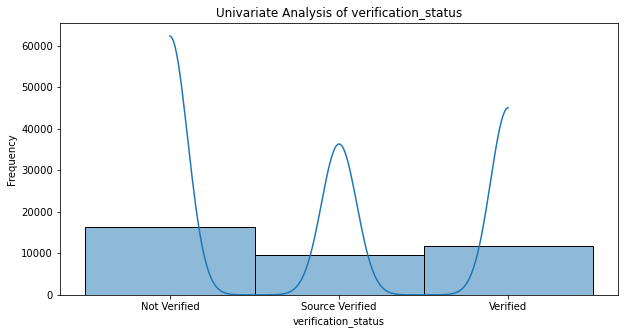

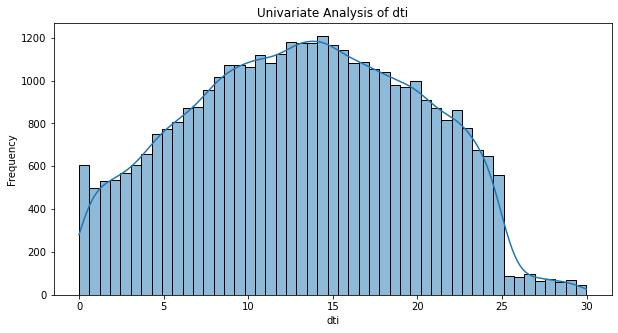

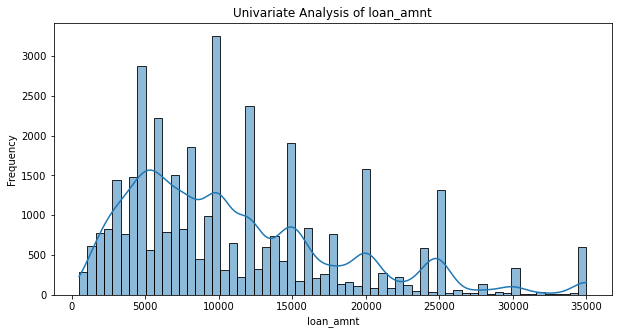

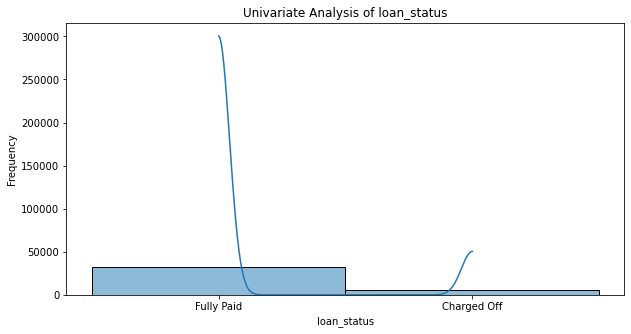

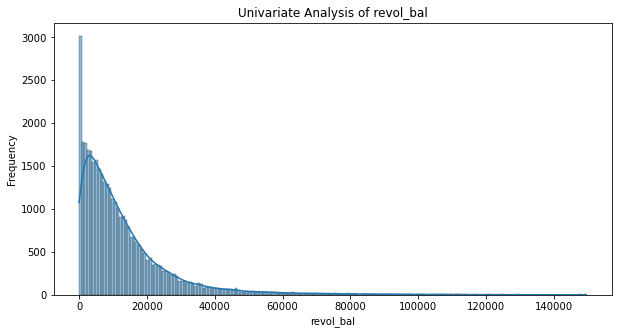

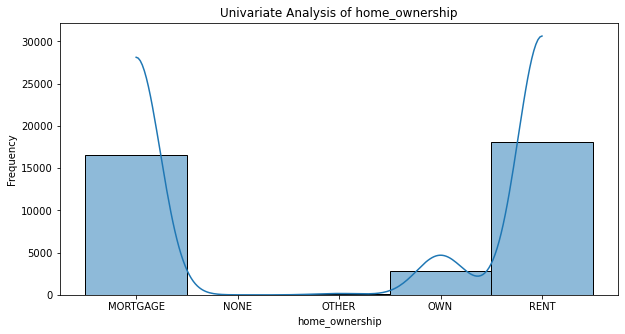

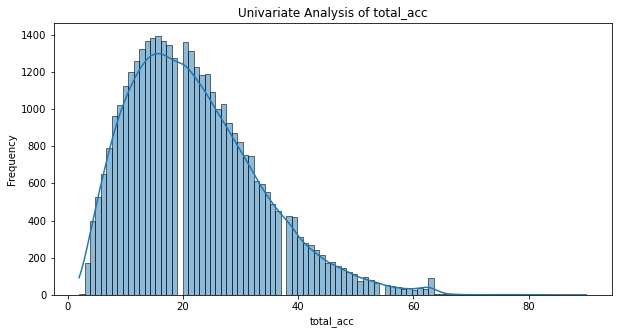

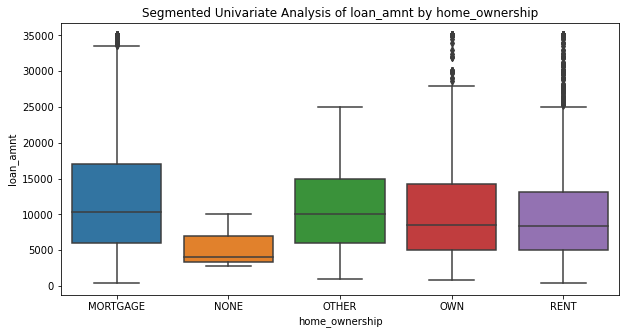

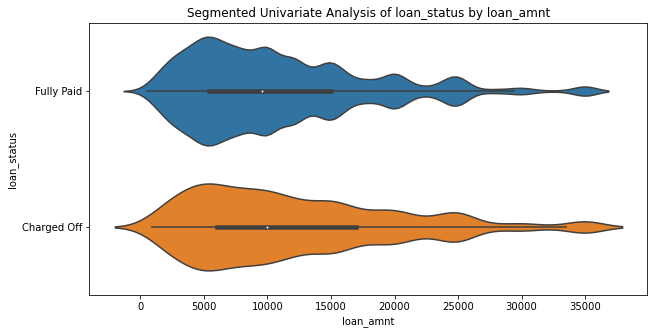

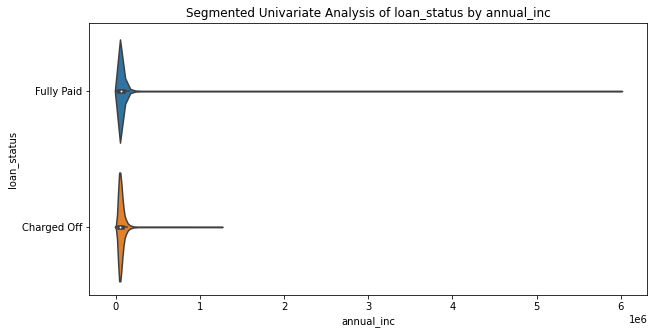

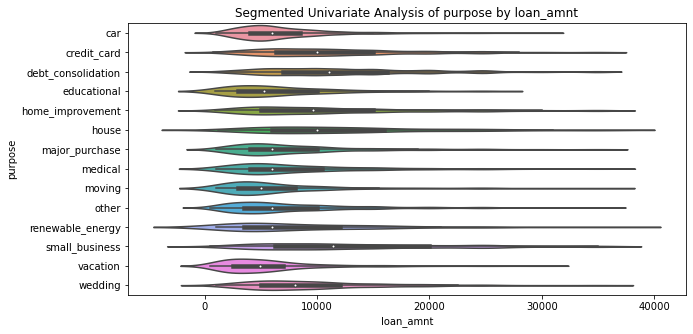

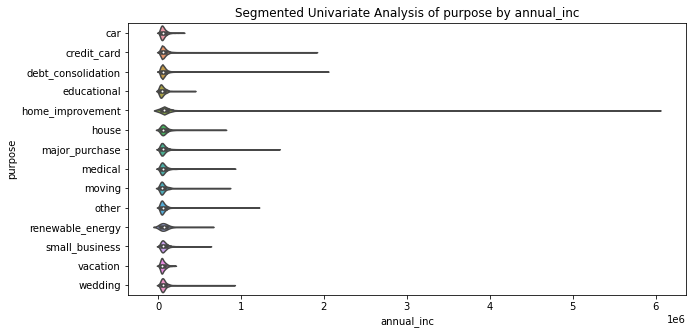

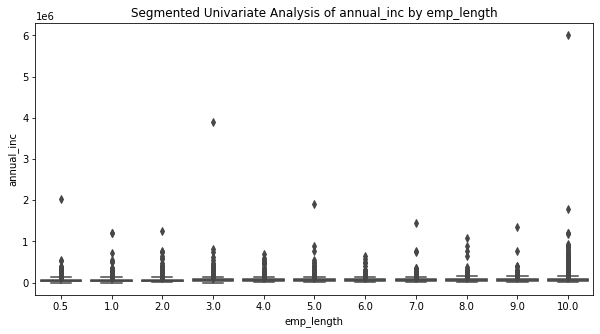

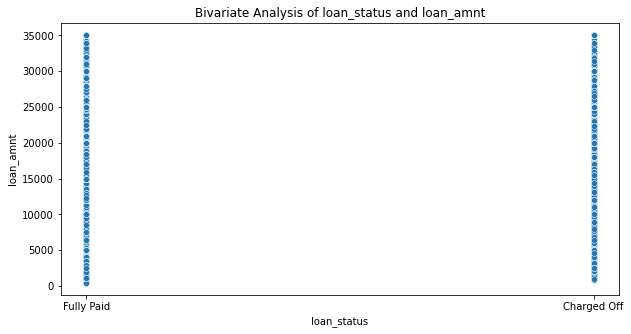

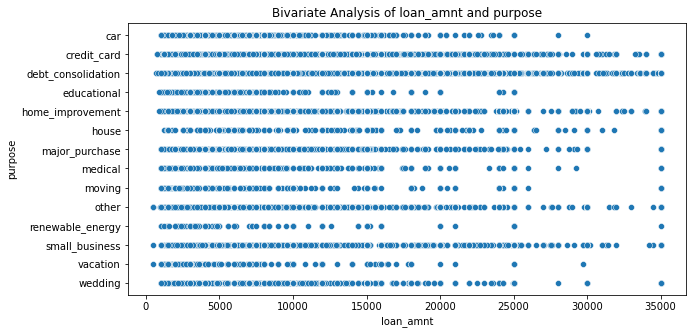

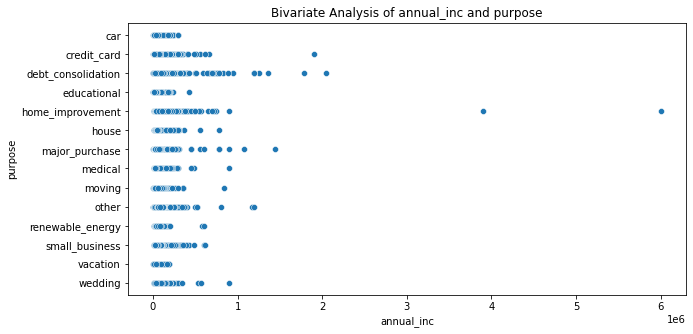

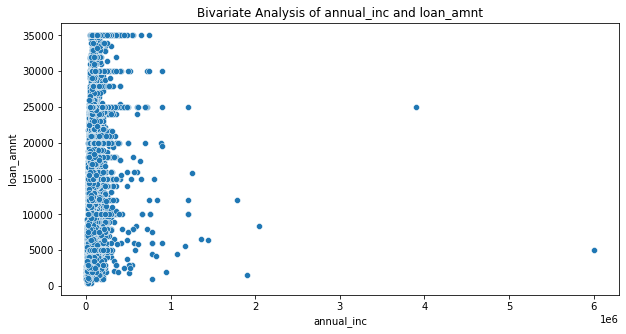

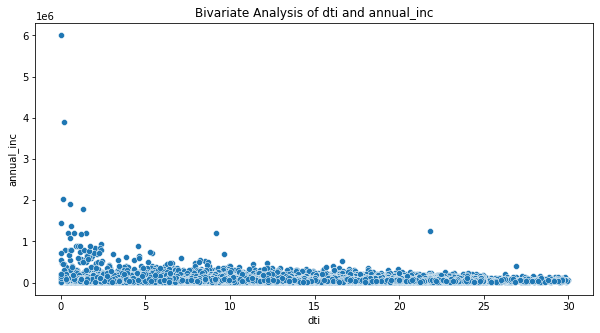

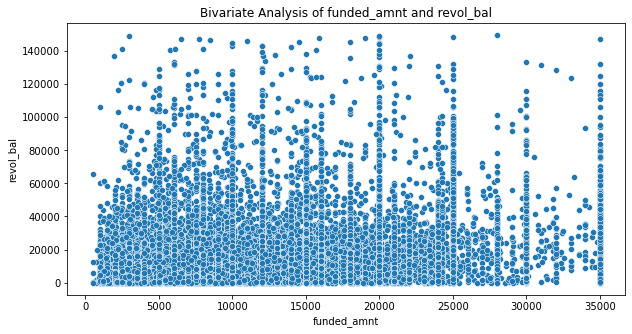

In [115]:
# Create a presentation object
prs = Presentation()

# Function to add a slide with a title and image
def add_slide(prs, title, img_path):
    slide_layout = prs.slide_layouts[5]  # Use the title slide layout
    slide = prs.slides.add_slide(slide_layout)
    title_placeholder = slide.shapes.title
    title_placeholder.text = title
    left = Inches(1)
    top = Inches(1.5)
    slide.shapes.add_picture(img_path, left, top, height=Inches(5.5))

# Univariate Analysis
def univariate_analysis(CustomerLoanData, column):
    plt.figure(figsize=(10, 5))
    sns.histplot(CustomerLoanData[column].dropna(), kde=True)
    plt.title(f'Univariate Analysis of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    img_path = f'Univariate_Analysis_of_{column}.png'
    plt.savefig(img_path)  # Save the plot
    plt.show()
    add_slide(prs, f'Univariate Analysis of {column}', img_path)

# Segmented Univariate Analysis
def segmented_univariate_analysis(CustomerLoanData, column, segment_by):
    plt.figure(figsize=(10, 5))
    if CustomerLoanData[column].dtype in ['float64', 'int64']:
        sns.boxplot(x=segment_by, y=column, data=CustomerLoanData)
    else:
        sns.violinplot(x=segment_by, y=column, data=CustomerLoanData)
    plt.title(f'Segmented Univariate Analysis of {column} by {segment_by}')
    plt.xlabel(segment_by)
    plt.ylabel(column)
    img_path = f'Segmented_Univariate_Analysis_of_{column}_by_{segment_by}.png'
    plt.savefig(img_path)  # Save the plot
    plt.show()
    add_slide(prs, f'Segmented Univariate Analysis of {column} by {segment_by}', img_path)


# Bivariate Analysis
def bivariate_analysis(CustomerLoanData, column1, column2):
    plt.figure(figsize=(10, 5))
    sns.scatterplot(x=column1, y=column2, data=CustomerLoanData)
    plt.title(f'Bivariate Analysis of {column1} and {column2}')
    plt.xlabel(column1)
    plt.ylabel(column2)
    img_path = f'Bivariate_Analysis_of_{column1}_and_{column2}.png'
    plt.savefig(img_path)  # Save the plot
    plt.show()
    add_slide(prs, f'Bivariate Analysis of {column1} and {column2}', img_path)

# Perform Univariate Analysis
univariate_columns = ['verification_status', 'dti', 'loan_amnt', 'loan_status', 'revol_bal', 'home_ownership', 'total_acc']
for column in univariate_columns:
    univariate_analysis(CustomerLoanData, column)


# Perform Segmented Univariate Analysis
segmented_columns = [('loan_amnt', 'home_ownership'), ('loan_status', 'loan_amnt'), ('loan_status', 'annual_inc'), ('purpose', 'loan_amnt'), ('purpose', 'annual_inc'), ('annual_inc', 'emp_length')]
for column, segment_by in segmented_columns:
    segmented_univariate_analysis(CustomerLoanData, column, segment_by)

# Perform Bivariate Analysis
bivariate_columns = [('loan_status', 'loan_amnt'), ('loan_amnt', 'purpose'), ('annual_inc', 'purpose'),  ('annual_inc', 'loan_amnt'), ('dti', 'annual_inc'), ('funded_amnt', 'revol_bal')]
for column1, column2 in bivariate_columns:
    bivariate_analysis(CustomerLoanData, column1, column2)
    
    
# Insights and observations can be derived from the visualizations produced by these functions.
# Documented in ppt

# Save the ppt
prs.save('CustomerLoanData_Analysis.pptx')